# GEDI Waveform Processor Demo

This demo shows how to process GEDI Level 1B waveform data for use in machine learning workflows using the `gedi_waveform_processor` library.

## 1. Load GEDI GeoJSON

In [5]:
import os
import geopandas as gpd
from pathlib import Path
from gedi_waveform_processor import GediWaveformProcessor



# get path to cwd and set project root
notebook_dir = Path.cwd()
project_root = notebook_dir.parent


# Load your GEDI subset GeoJSON here
gdf = gpd.read_file(os.path.join(project_root, "data\\sample_data.geojson"))
print(f"Loaded {len(gdf)} shots")


Loaded 2000 shots


## 2. Initialize Processor

In [6]:
# initialize the processor class
processor = GediWaveformProcessor(gdf)

In [7]:
# view the raw geodataframe
processor.gdf

,BEAM,shot_number_x,Latitude,Longitude,index,geolocation_degrade,geolocation_delta_time,geolocation_digital_elevation_model,geolocation_digital_elevation_model_srtm,geolocation_elevation_bin0,...,land_ice,inland_water,noise_mean_corrected,rx_sample_count,rxwaveform,shot_number_y,stale_return_flag,tx_sample_count,txwaveform,geometry
0,BEAM1011,27691100200072082,33.809777,107.649520,199,80,4.528989e+07,1714.6307,1739.5233,2242.253954,...,0,0,222.6250,701,"221.6659,221.3237,220.94824,220.46674,219.9665...",27691100200072082,1,128,"220.4585,220.41524,220.64136,220.9145,221.2094...",POINT (107.64952 33.80978)
1,BEAM1011,159781100200072490,33.835104,107.743310,410,80,1.188987e+08,2008.7092,2011.6162,4202.210841,...,0,0,221.1250,701,"219.91951,219.35326,219.22943,219.70805,220.46...",159781100200072490,1,128,"223.25903,224.60262,225.77637,226.35803,226.25...",POINT (107.74331 33.8351)
2,BEAM1011,126131100300397254,33.696352,107.562900,5,0,1.001413e+08,2269.0400,2219.5291,7916.283941,...,0,0,223.0625,701,"221.84064,221.92987,222.35782,222.75287,222.77...",126131100300397254,1,128,"225.68507,226.35516,226.76404,226.71179,226.07...",POINT (107.5629 33.69635)
3,BEAM1000,220390800300397265,33.723132,107.600774,90,0,1.526705e+08,2674.3628,2702.6147,5198.144388,...,0,0,254.5000,701,"253.66321,253.91985,254.42722,254.8656,255.008...",220390800300397265,1,128,"253.58847,253.66493,253.87726,254.2573,254.898...",POINT (107.60077 33.72313)
4,BEAM1000,81750800300397560,33.780101,107.687349,215,0,7.540656e+07,2124.3906,2125.7017,1519.923845,...,0,0,254.8125,701,"255.71996,255.35083,254.91237,254.77736,255.07...",81750800300397560,1,128,"252.30379,251.79921,251.73718,251.99379,252.25...",POINT (107.68735 33.7801)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,BEAM1000,218360800200073892,33.730476,107.667010,135,0,1.515380e+08,2423.8545,2444.7678,2513.288313,...,0,0,253.4375,923,"253.4743,254.28654,255.17464,255.79982,256.022...",218360800200073892,0,128,"251.9591,251.3554,250.81506,250.49,250.50542,2...",POINT (107.66701 33.73048)
1996,BEAM0110,159780600200431984,33.763351,107.634411,163,70,1.188987e+08,2029.6699,2029.6421,4261.291144,...,0,0,227.1875,814,"227.93925,230.05203,232.58894,234.35979,234.31...",159780600200431984,0,128,"228.61528,228.39752,227.60045,226.59819,226.10...",POINT (107.63441 33.76335)
1997,BEAM0110,102140600200429300,33.687651,107.730849,17,0,8.676888e+07,1972.1461,1966.9437,5164.809521,...,0,0,228.6875,767,"229.84879,229.99007,229.81833,229.59625,229.75...",102140600200429300,1,128,"228.36598,228.7097,229.20503,229.41357,228.980...",POINT (107.73085 33.68765)
1998,BEAM1000,73210800300398891,33.809657,107.713173,130,0,7.064660e+07,1652.4048,1645.6504,1591.942510,...,0,0,254.8750,701,"252.74342,252.45303,252.35129,252.28816,252.19...",73210800300398891,1,128,"257.84387,258.77847,258.94144,258.3585,257.516...",POINT (107.71317 33.80966)


## 3. Filter Shots by Quality Flags and Elevation

In [4]:
filtered = processor.filter_shots(max_elevation_diff=200)
filtered

,BEAM,shot_number_x,Latitude,Longitude,index,geolocation_degrade,geolocation_delta_time,geolocation_digital_elevation_model,geolocation_digital_elevation_model_srtm,geolocation_elevation_bin0,...,land_ice,inland_water,noise_mean_corrected,rx_sample_count,rxwaveform,shot_number_y,stale_return_flag,tx_sample_count,txwaveform,geometry
398,BEAM0101,26210500300373479,33.747044,107.560844,0,0,4.446746e+07,2143.1614,2131.5166,2192.352745,...,0,0,205.1250,740,"203.55956,202.98267,202.70265,202.81763,203.33...",26210500300373479,0,128,"203.53235,202.36287,201.33565,200.75517,200.62...",POINT (107.56084 33.74704)
399,BEAM0101,26210500300373480,33.746696,107.561272,1,0,4.446746e+07,2178.5676,2171.5178,2239.495132,...,0,0,204.8125,983,"204.50717,203.88394,203.1297,202.62317,202.625...",26210500300373480,0,128,"202.85083,202.22029,202.14107,202.73271,203.75...",POINT (107.56127 33.7467)
400,BEAM0101,26210500300373481,33.746348,107.561700,2,0,4.446746e+07,2178.5676,2195.5186,2285.556381,...,0,0,204.6875,803,"204.20847,204.16566,204.52599,205.25452,205.96...",26210500300373481,0,128,"207.15926,207.34532,207.19312,206.89465,206.55...",POINT (107.5617 33.74635)
401,BEAM0101,26210500300373482,33.745996,107.562134,3,0,4.446746e+07,2187.9270,2235.5200,2313.214639,...,0,0,204.5000,789,"207.47687,207.46866,206.57042,205.12569,203.64...",26210500300373482,0,128,"206.64708,206.83879,206.7011,206.65683,207.080...",POINT (107.56213 33.746)
404,BEAM0101,26210500300373485,33.744924,107.563464,6,0,4.446746e+07,2267.3174,2261.5232,2313.632944,...,0,0,205.0625,799,"204.92876,205.12674,205.34102,205.25084,204.56...",26210500300373485,0,128,"205.0166,205.06018,204.88936,204.389,203.7365,...",POINT (107.56346 33.74492)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42870,BEAM1000,220390800300397361,33.688209,107.644044,186,0,1.526705e+08,2412.3032,2412.7305,2461.026461,...,0,0,254.6875,777,"256.96228,257.13992,256.22,254.5427,252.97011,...",220390800300397361,0,128,"255.30927,255.74591,255.81168,255.28499,254.19...",POINT (107.64404 33.68821)
42871,BEAM1000,220390800300397362,33.687849,107.644489,187,0,1.526705e+08,2406.9277,2424.7312,2477.102723,...,0,0,254.6875,716,"255.14694,255.15303,255.00943,254.66737,254.11...",220390800300397362,0,128,"254.95772,255.24657,255.56967,255.76874,255.78...",POINT (107.64449 33.68785)
42878,BEAM1000,220390800300397369,33.685365,107.647559,194,0,1.526705e+08,2352.2800,2353.7397,2375.979985,...,0,0,254.6875,768,"251.94301,251.1448,250.63002,250.27936,249.848...",220390800300397369,0,128,"255.5674,255.42928,254.67789,253.53163,252.592...",POINT (107.64756 33.68536)
42880,BEAM1000,220390800300397371,33.684658,107.648432,196,0,1.526705e+08,2302.7922,2300.7419,2326.478171,...,0,0,254.9375,730,"256.58234,256.3351,255.74768,255.24425,255.095...",220390800300397371,0,128,"253.37155,253.14557,253.18513,253.54791,254.23...",POINT (107.64843 33.68466)


## 4. Plot Random GEDI Waveforms

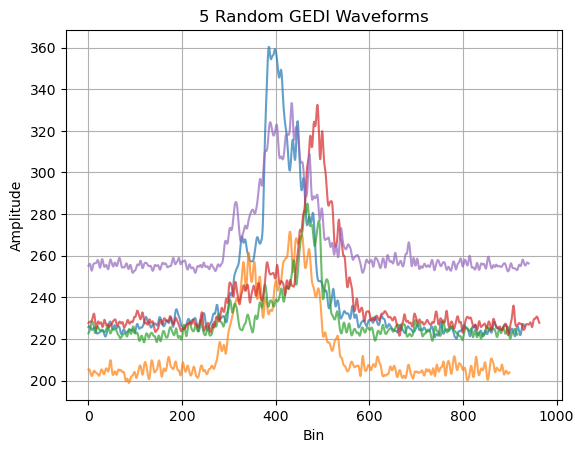

In [5]:
processor.plot_random_waveforms(n=5)

## 5. Process All Waveforms for ML Input

In [6]:
processor.process_all_waveforms(target_length=500, resample_method= 'fft', norm_method='zscore')

Done. Skipped 134 invalid or malformed waveforms.


,BEAM,shot_number_x,Latitude,Longitude,index,geolocation_degrade,geolocation_delta_time,geolocation_digital_elevation_model,geolocation_digital_elevation_model_srtm,geolocation_elevation_bin0,...,inland_water,noise_mean_corrected,rx_sample_count,rxwaveform,shot_number_y,stale_return_flag,tx_sample_count,txwaveform,geometry,rxwaveform_pro
398,BEAM0101,26210500300373479,33.747044,107.560844,0,0,4.446746e+07,2143.1614,2131.5166,2192.352745,...,0,205.1250,740,"203.55956,202.98267,202.70265,202.81763,203.33...",26210500300373479,0,128,"203.53235,202.36287,201.33565,200.75517,200.62...",POINT (107.56084 33.74704),"[-0.9218281813843839, -1.1113573210858003, -1...."
399,BEAM0101,26210500300373480,33.746696,107.561272,1,0,4.446746e+07,2178.5676,2171.5178,2239.495132,...,0,204.8125,983,"204.50717,203.88394,203.1297,202.62317,202.625...",26210500300373480,0,128,"202.85083,202.22029,202.14107,202.73271,203.75...",POINT (107.56127 33.7467),"[-0.5168544524704489, -0.910776655988615, -1.0..."
400,BEAM0101,26210500300373481,33.746348,107.561700,2,0,4.446746e+07,2178.5676,2195.5186,2285.556381,...,0,204.6875,803,"204.20847,204.16566,204.52599,205.25452,205.96...",26210500300373481,0,128,"207.15926,207.34532,207.19312,206.89465,206.55...",POINT (107.5617 33.74635),"[-0.4764343570952085, -0.5456489894035899, -0...."
401,BEAM0101,26210500300373482,33.745996,107.562134,3,0,4.446746e+07,2187.9270,2235.5200,2313.214639,...,0,204.5000,789,"207.47687,207.46866,206.57042,205.12569,203.64...",26210500300373482,0,128,"206.64708,206.83879,206.7011,206.65683,207.080...",POINT (107.56213 33.746),"[-0.1181980306327183, -0.07683672455469044, -0..."
404,BEAM0101,26210500300373485,33.744924,107.563464,6,0,4.446746e+07,2267.3174,2261.5232,2313.632944,...,0,205.0625,799,"204.92876,205.12674,205.34102,205.25084,204.56...",26210500300373485,0,128,"205.0166,205.06018,204.88936,204.389,203.7365,...",POINT (107.56346 33.74492),"[-0.6098111343070189, -0.5747041202133765, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42870,BEAM1000,220390800300397361,33.688209,107.644044,186,0,1.526705e+08,2412.3032,2412.7305,2461.026461,...,0,254.6875,777,"256.96228,257.13992,256.22,254.5427,252.97011,...",220390800300397361,0,128,"255.30927,255.74591,255.81168,255.28499,254.19...",POINT (107.64404 33.68821),"[-0.07392621073038826, -0.07964572432435325, -..."
42871,BEAM1000,220390800300397362,33.687849,107.644489,187,0,1.526705e+08,2406.9277,2424.7312,2477.102723,...,0,254.6875,716,"255.14694,255.15303,255.00943,254.66737,254.11...",220390800300397362,0,128,"254.95772,255.24657,255.56967,255.76874,255.78...",POINT (107.64449 33.68785),"[-0.13665101682140965, -0.10822572086011853, -..."
42878,BEAM1000,220390800300397369,33.685365,107.647559,194,0,1.526705e+08,2352.2800,2353.7397,2375.979985,...,0,254.6875,768,"251.94301,251.1448,250.63002,250.27936,249.848...",220390800300397369,0,128,"255.5674,255.42928,254.67789,253.53163,252.592...",POINT (107.64756 33.68536),"[-1.0186771313516785, -1.4874691431242975, -1...."
42880,BEAM1000,220390800300397371,33.684658,107.648432,196,0,1.526705e+08,2302.7922,2300.7419,2326.478171,...,0,254.9375,730,"256.58234,256.3351,255.74768,255.24425,255.095...",220390800300397371,0,128,"253.37155,253.14557,253.18513,253.54791,254.23...",POINT (107.64843 33.68466),"[0.0611718709142516, 0.007069894691570497, -0...."


## 6. Visualize Processed Waveforms

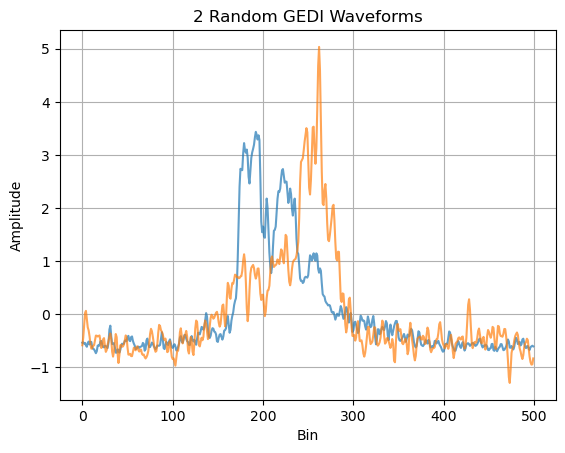

In [12]:
processor.plot_random_waveforms(n = 2)

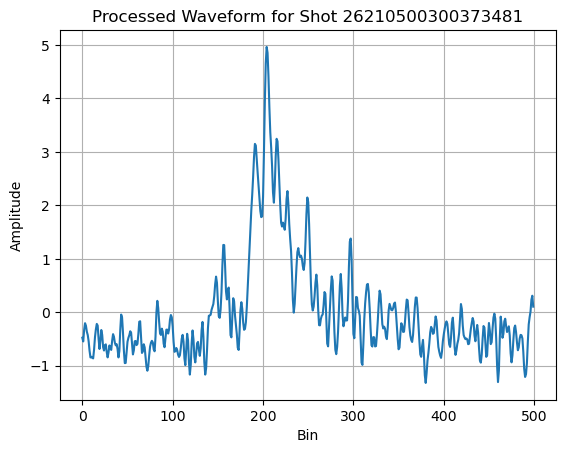

In [8]:
processor.plot_waveform(shot_number_x = 26210500300373481)

## 7. Export to HDF5 / TensorFlow / PyTorch

In [9]:
# Export all in one go
processor.export_ml_ready_dataset("gedi_waveforms_tf.npz", format="npz")
# processor.export_ml_ready_dataset("gedi_waveforms_torch.pt", format="pt")

✅ Saved TensorFlow-ready dataset to gedi_waveforms_tf.npz
